In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

import setting
inputType ='influx' # or file

In [2]:
setting.outlier_param

{'certainErrorToNaN': {'flag': True},
 'unCertainErrorToNaN': {'flag': True, 'param': {'neighbor': [0.5, 0.6]}},
 'data_type': 'air'}

In [3]:
# Declare your own data
input_data = setting.inputControl(inputType)
# Make noise
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

Data Length: 181319


In [4]:
# Preprocessing
from KETIPrePartialDataPreprocessing import data_preprocessing
column_name = input_test_data.columns[8]

input_data =  input_test_data[[column_name]][300:20000]

partialP = data_preprocessing.packagedPartialProcessing(setting.process_param)
output = partialP.allPartialProcessing(input_data)

getDataWithCertainNaN
getDataWithUncertainNaN
48.71324753782121 58.45589704538545
after Drop NaN Data
===== NaN data Ratio summary ======
in_cici_voc    0.17
dtype: float64
===== NaN data Ratio summary ======
in_cici_voc    0.0
dtype: float64


key:  original Data Leangth: 19700 Data NaN Length: in_cici_voc    0
dtype: int64


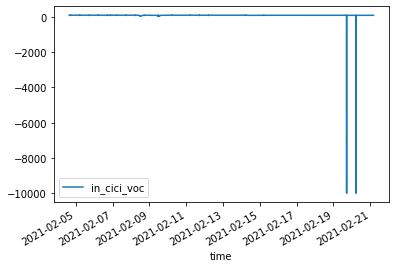

key:  refined_data Data Leangth: 23823 Data NaN Length: in_cici_voc    4123
dtype: int64


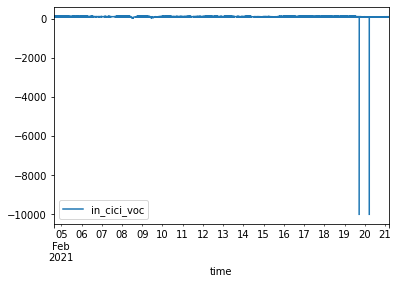

key:  datawithMoreCertainNaN Data Leangth: 23823 Data NaN Length: in_cici_voc    4125
dtype: int64


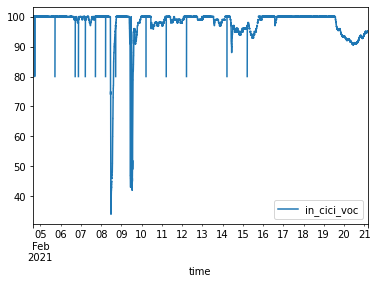

key:  datawithMoreUnCertainNaN Data Leangth: 23823 Data NaN Length: in_cici_voc    4125
dtype: int64


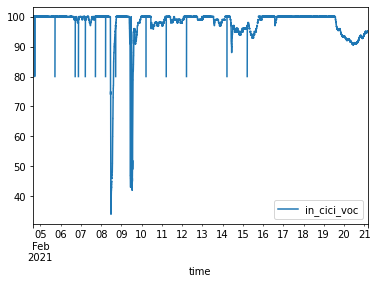

key:  imputed_data Data Leangth: 23823 Data NaN Length: in_cici_voc    0
dtype: int64


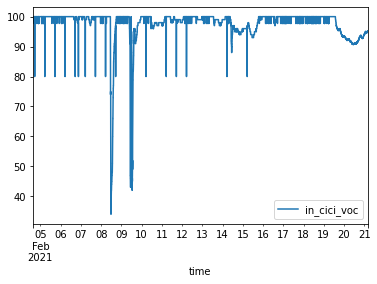

In [5]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    temp.plot()
    plt.show()

## Code Test

In [6]:
test_data = output['imputed_data']
test_data.isna().sum()

in_cici_voc    0
dtype: int64

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decompfreq = 30
result = seasonal_decompose(test_data, model='additive', freq=decompfreq)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

ModuleNotFoundError: No module named 'pycaret'